<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 2 - REDES CONVOLUCIONAIS DE CLASSIFICAÇÃO (Testando vários classificadores)

In [1]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

#Convertendo para uma matriz numpy ao invés de dataframe.
X = X.to_numpy()
Y = y.to_numpy()
X.shape, Y.shape

((70000, 784), (70000,))

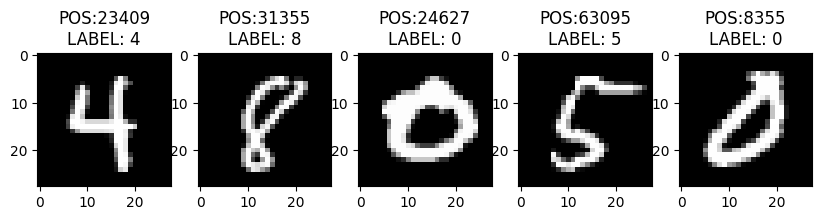

In [3]:
import random
import matplotlib.pyplot as plt
j=1
plt.figure(figsize=(10,10))
for i in random.sample(range(len(X)), 5):
  plt.subplot(1,5,j)
  plt.title(f"POS:{i}\nLABEL: {Y[i]}")
  plt.imshow(X[i].reshape((28,28)), cmap="gray")
  j+=1
plt.show()

# Experimento 1 - Rede neural densa

In [4]:
import numpy as np
Y2 = np.array([np.eye(10)[_] for _ in Y])
Y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((56000, 784), (14000, 784), (56000, 10), (14000, 10))

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define o modelo sequencial
model = models.Sequential()

# Adiciona a camada de entrada e a primeira camada oculta
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))

# Adiciona a camada de saída
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8733 - val_loss: 0.2262 - val_accuracy: 0.9353
Epoch 2/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1793 - accuracy: 0.9484 - val_loss: 0.1756 - val_accuracy: 0.9505
Epoch 3/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1345 - accuracy: 0.9610 - val_loss: 0.1448 - val_accuracy: 0.9581
Epoch 4/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.1060 - accuracy: 0.9691 - val_loss: 0.1257 - val_accuracy: 0.9644
Epoch 5/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9746 - val_loss: 0.1120 - val_accuracy: 0.9670
Epoch 6/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.1038 - val_accuracy: 0.9694
Epoch 7/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.1023 - val_accuracy:

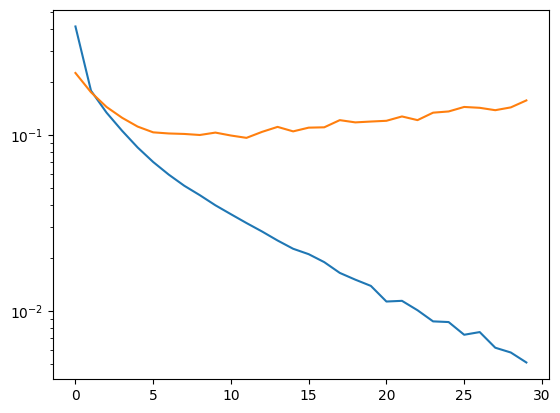

In [24]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")


In [54]:
X_train2 = X_train.reshape( (-1,28,28,1) )
X_test2 = X_test.reshape( (-1,28,28,1) )
X_train2 = np.pad(X_train2,((0,0),(2,2),(2,2),(0,0)))
X_test2 = np.pad(X_test2,((0,0),(2,2),(2,2),(0,0)))

In [55]:
import tensorflow as tf
from tensorflow.keras import models, layers

model2 = models.Sequential([
    # C1: Camada de Convolução
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    # S2: Camada de Subamostragem
    layers.AveragePooling2D(pool_size=(2, 2)),

    # C3: Camada de Convolução
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    # S4: Camada de Subamostragem
    layers.AveragePooling2D(pool_size=(2, 2)),

    # C5: Camada de Convolução, atua como uma camada densa pela forma como é aplicada
    layers.Conv2D(120, kernel_size=(5, 5), activation='relu'),

    # Flatten antes das camadas densas
    layers.Flatten(),

    # F6: Camada Densa
    layers.Dense(84, activation='relu'),

    # Camada de Saída
    layers.Dense(10, activation='softmax')
])

# Compila o modelo
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostra um resumo do modelo
model2.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_40 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_13 (Flatten)        (None, 120)             

In [57]:
history = model2.fit(X_train2, Y_train, epochs=30, validation_data=(X_test2, Y_test))

Epoch 1/30
1750/1750 [==============================] - 36s 19ms/step - loss: 0.2457 - accuracy: 0.9245 - val_loss: 0.1136 - val_accuracy: 0.9659
Epoch 2/30
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0736 - val_accuracy: 0.9771
Epoch 3/30
1750/1750 [==============================] - 34s 19ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0572 - val_accuracy: 0.9830
Epoch 4/30
1750/1750 [==============================] - 38s 22ms/step - loss: 0.0424 - accuracy: 0.9872 - val_loss: 0.0510 - val_accuracy: 0.9849
Epoch 5/30
1750/1750 [==============================] - 33s 19ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0399 - val_accuracy: 0.9881
Epoch 6/30
1750/1750 [==============================] - 35s 20ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0448 - val_accuracy: 0.9872
Epoch 7/30
1750/1750 [==============================] - 32s 18ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0412 -

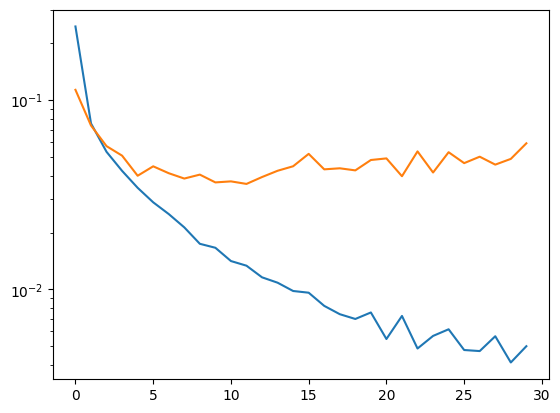

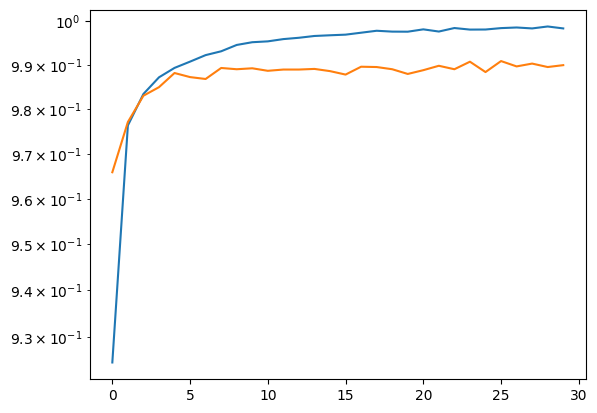

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")
plt.show()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.yscale("log")

In [65]:
model2.layers[-3].output_shape

(None, 120)

In [68]:
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model2.input, outputs=model2.layers[-3].output)

In [70]:
embeddings_train = intermediate_layer_model.predict(X_train2)

1750/1750 [==============================] - 16s 9ms/step


In [82]:
Y_cattegorical = np.argmax(Y_train, axis=1)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model3 = RandomForestClassifier(n_estimators=20, random_state=42)


In [110]:
model3.fit(embeddings_train, Y_cattegorical)

RandomForestClassifier(n_estimators=20, random_state=42)

In [111]:
(model3.predict(embeddings_train)==Y_cattegorical).sum()/len(embeddings_train)

0.9999464285714286

In [91]:
model2.predict(X_train2)

1750/1750 [==============================] - 19s 11ms/step


array([[9.8565027e-23, 9.3730989e-20, 1.5375574e-22, ..., 2.0224198e-25,
        2.4608618e-17, 1.6159872e-15],
       [2.3578757e-23, 2.6670932e-19, 3.6944033e-24, ..., 6.5668678e-17,
        4.2593928e-16, 6.4157631e-13],
       [2.0099083e-12, 8.8156652e-12, 1.2490681e-13, ..., 5.8332935e-12,
        9.9999994e-01, 5.2265974e-12],
       ...,
       [2.3343052e-13, 9.9999994e-01, 4.1421258e-19, ..., 7.4327575e-12,
        2.0417284e-11, 3.8537001e-14],
       [9.9999994e-01, 2.7352814e-20, 4.0519769e-21, ..., 8.3502525e-22,
        9.5837861e-26, 1.7229138e-24],
       [9.9999994e-01, 5.3975596e-12, 2.2210727e-12, ..., 8.9670923e-15,
        1.9941548e-14, 4.3633153e-15]], dtype=float32)

In [113]:
%timeit model3.predict(embeddings_train)

247 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
(model3.predict(intermediate_layer_model(X_test2))==np.argmax(Y_test, axis=1)).sum()/len(X_test2)

0.9881428571428571

In [97]:
np.argmax(Y_test, axis=1)

array([8, 4, 8, ..., 2, 7, 1])